IMPORT BASIC LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("data/CTG.csv")
df

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,S8001045.dsp,6/6/1998,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2125,S8001045.dsp,6/6/1998,CTG2128.txt,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
good = df[df.NSP==1]
good.shape

(1655, 40)

In [4]:
medium=df[df.NSP==2]
medium.shape

(295, 40)

In [5]:
critical=df[df.NSP==3]
critical.shape

(176, 40)

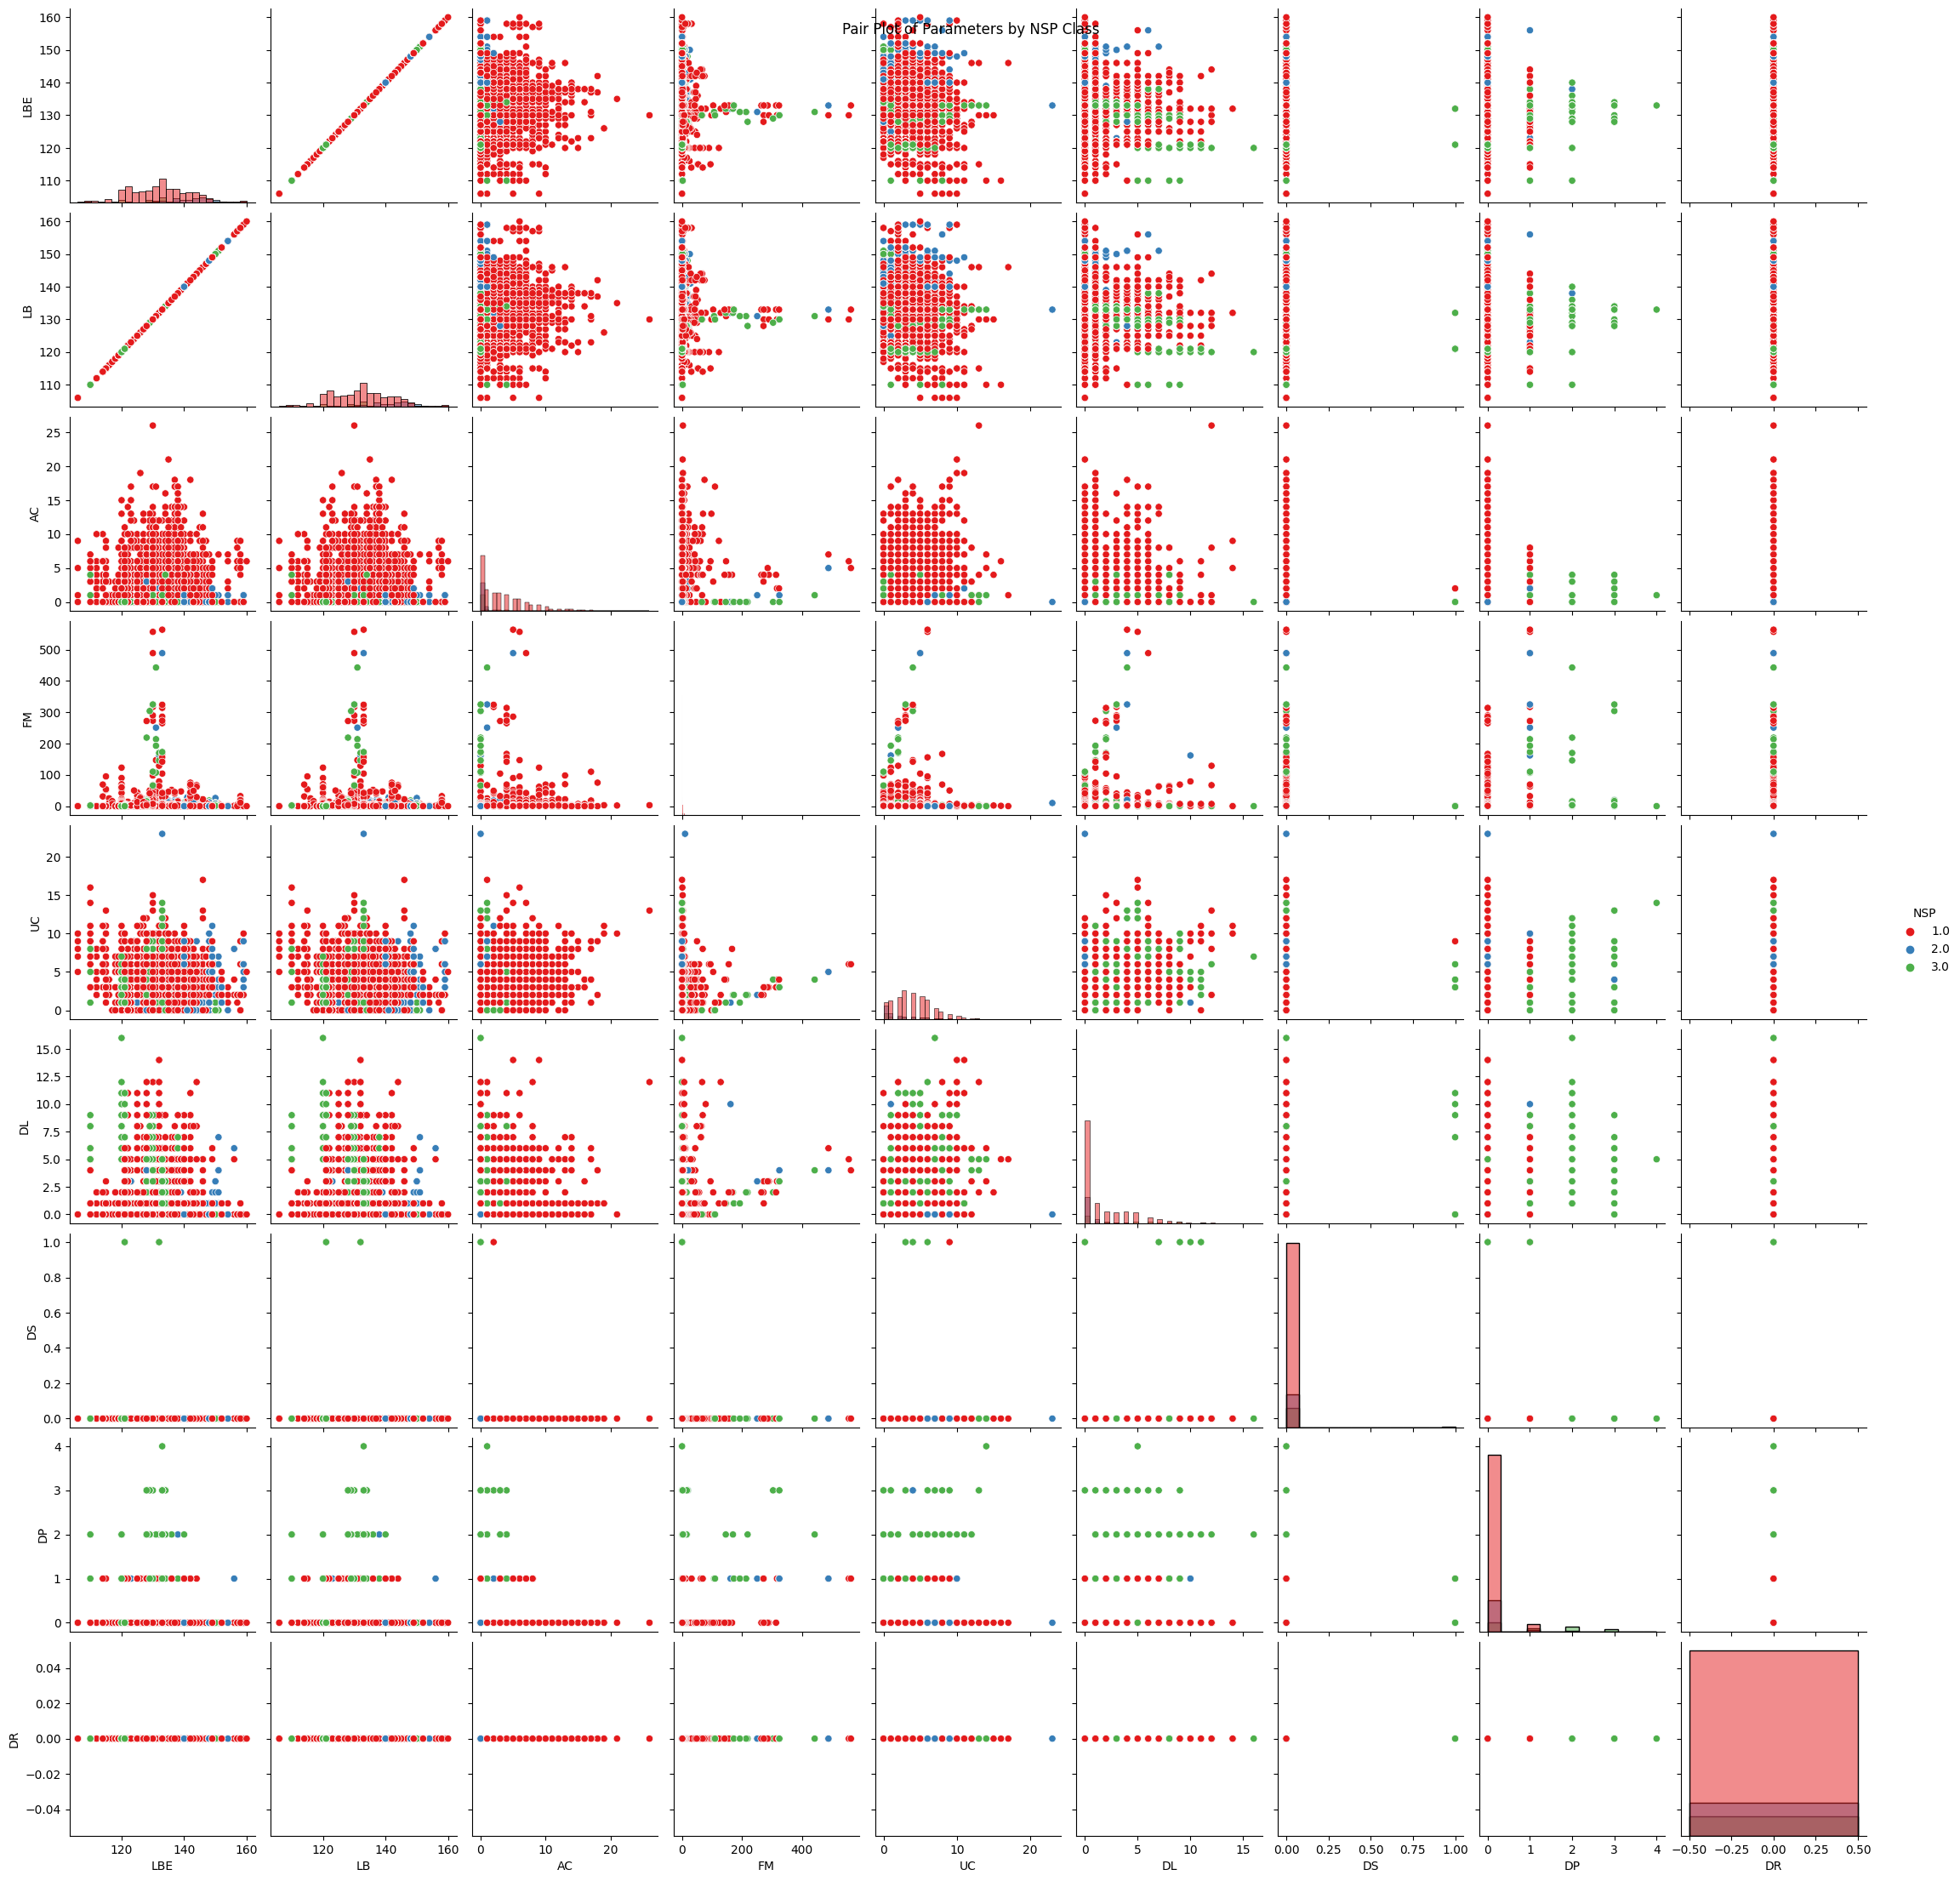

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a pandas DataFrame
# data = pd.read_csv("data/CTG.csv")

# Choose the columns for the pair plot
columns_to_visualize = ['LBE', 'LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'DR']

# Define a custom color palette (optional)
custom_palette = sns.color_palette("Set1")  # Use any valid seaborn color palette here

# Create the pair plot with custom dot colors
sns.pairplot(df, vars=columns_to_visualize, hue="NSP", diag_kind="hist", palette=custom_palette)
plt.suptitle("Pair Plot of Parameters by NSP Class")
plt.show()


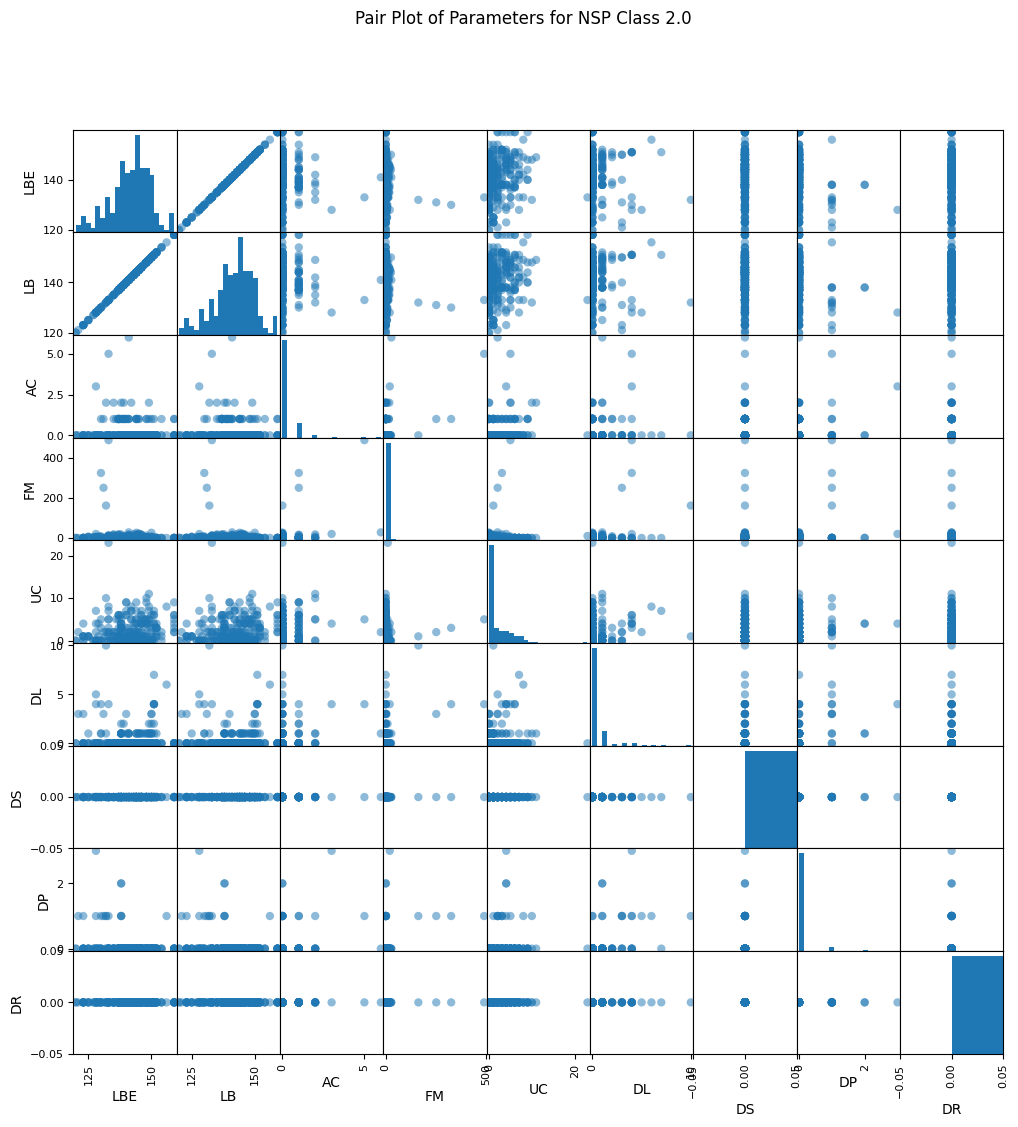

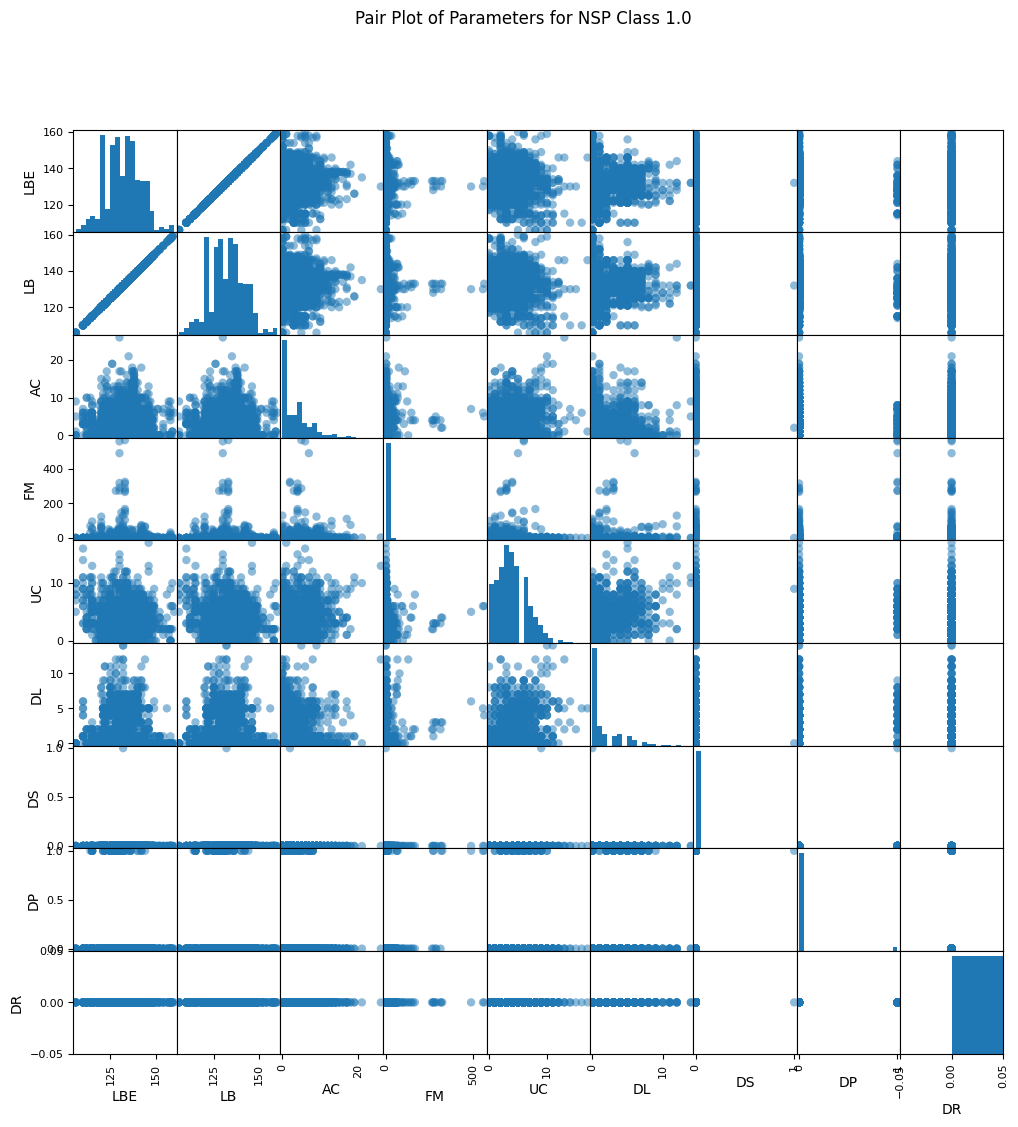

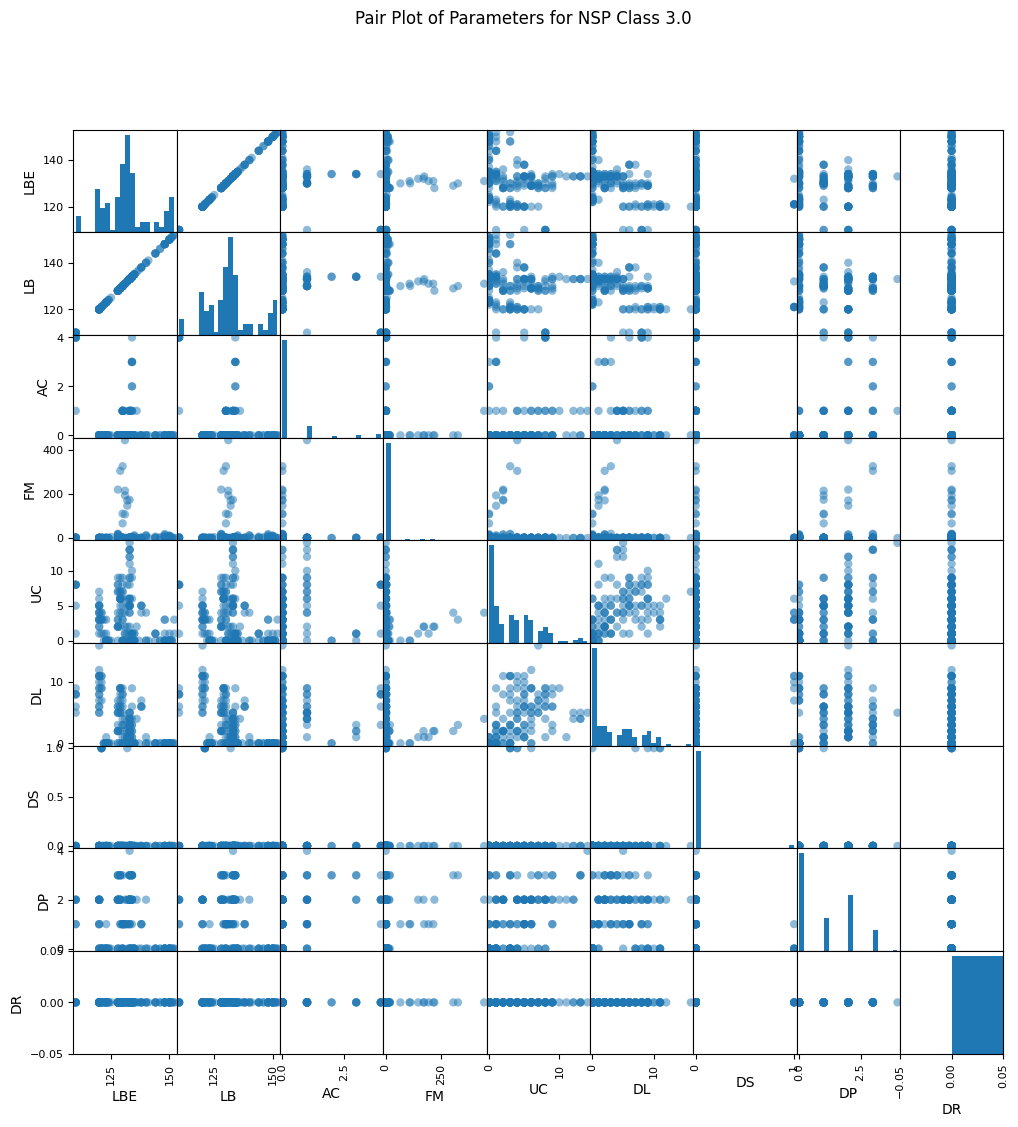

ValueError: zero-size array to reduction operation minimum which has no identity

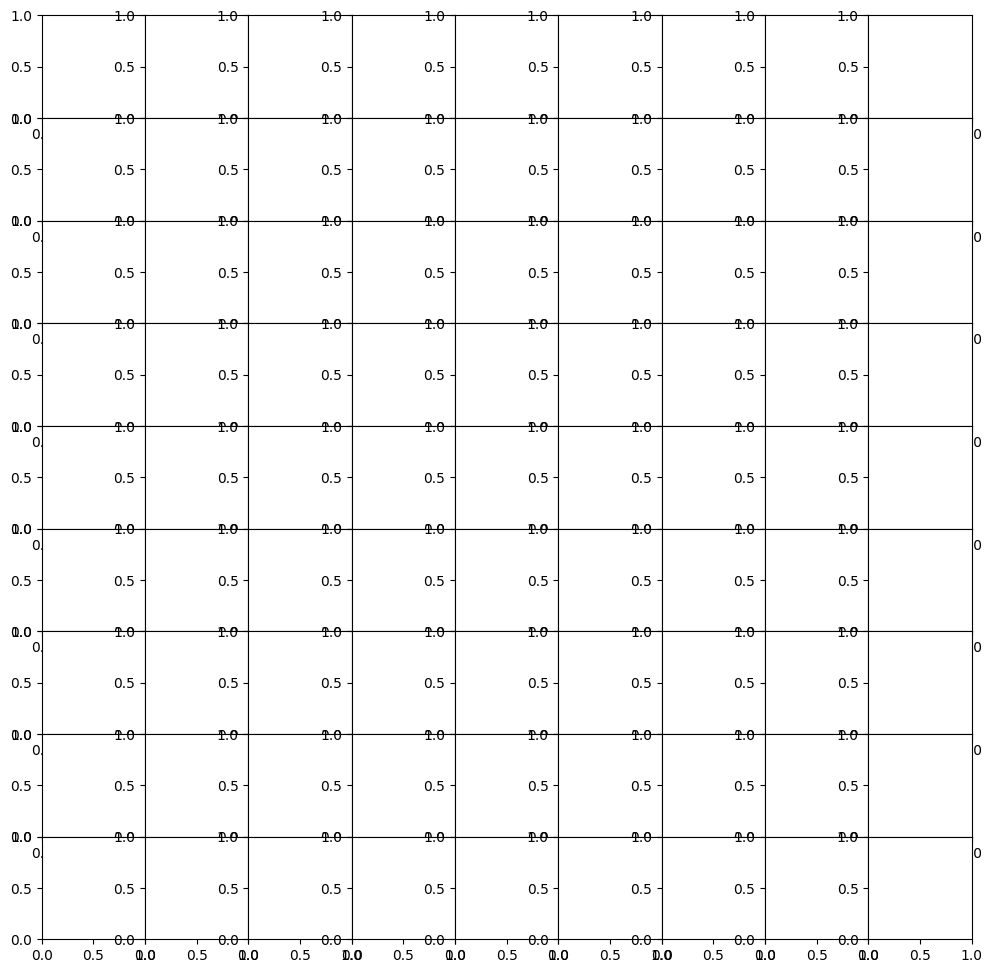

In [8]:
import pandas as pd
import matplotlib.pyplot as plt



# Choose the columns for the pair plot
columns_to_visualize = ['LBE', 'LB', 'AC', 'FM', 'UC', 'DL','DS', 'DP', 'DR']

# Get the unique values of the "NSP" column
nsp_classes = df["NSP"].unique()

# Loop through each class and create the pair plot
for nsp_class in nsp_classes:
    class_data = df[df["NSP"] == nsp_class]
    pd.plotting.scatter_matrix(class_data[columns_to_visualize], figsize=(12, 12), marker="o", hist_kwds={"bins": 20})
    plt.suptitle(f"Pair Plot of Parameters for NSP Class {nsp_class}")
    plt.show()


**CLEANING THE DATA AND PREPARING INPUT AND OUTPUT FIELDS**

In [9]:
df=df.drop(["FileName","Date","SegFile","b","e"],axis=1)
df=df.dropna()
df.isnull().sum()
X=df[['LBE', 'LB', 'AC', 'FM', 'UC', 'DL',
       'DS', 'DP', 'DR']]
Y=df[["NSP"]]


In [10]:
X.shape

(2126, 9)

**PERFORMING THE SCALING**

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
Scaler=StandardScaler()
X=Scaler.fit_transform(X)
X

array([[-1.35222005, -1.35222005, -0.76473985, ..., -0.0574756 ,
        -0.27153003,  0.        ],
       [-0.1325256 , -0.1325256 ,  0.35885166, ..., -0.0574756 ,
        -0.27153003,  0.        ],
       [-0.03088439, -0.03088439, -0.20294409, ..., -0.0574756 ,
        -0.27153003,  0.        ],
       ...,
       [ 0.68060404,  0.68060404, -0.48384197, ..., -0.0574756 ,
        -0.27153003,  0.        ],
       [ 0.68060404,  0.68060404, -0.48384197, ..., -0.0574756 ,
        -0.27153003,  0.        ],
       [ 0.88388645,  0.88388645, -0.48384197, ..., -0.0574756 ,
        -0.27153003,  0.        ]])

**SPLITTING THE DATASET INTO TRAINING SET AND TEST SET**

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [13]:
X_train.shape

(1488, 9)

In [14]:
X_test.shape

(638, 9)

SUPPORT VECTOR CLASSIFIER MODEL

In [15]:
from sklearn.svm import SVC

svm_clf=SVC(kernel="poly",degree=6,coef0=5,gamma=0.1)
svm_clf=svm_clf.fit(X_train,y_train)
y_pred=svm_clf.predict(X_test)

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
df0=df[df.NSP==1]
df1=df[df.NSP==2]
df2=df[df.NSP==3]

Text(0, 0.5, 'AC')

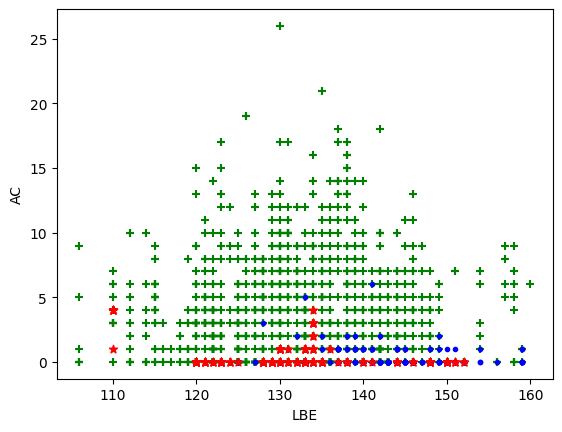

In [17]:
plt.scatter(df0['LBE'],df0['AC'],color='green',marker='+')
plt.scatter(df1['LBE'],df1['AC'],color='blue',marker='.')
plt.scatter(df2['LBE'],df2['AC'],color='red',marker='*')
plt.xlabel("LBE")
plt.ylabel("AC")


CALCULATING DIFFERENT METRICS

In [18]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
print("CONFUSION MATRIX")
cm=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print("F1-score:",f1_score(y_test,y_pred,average='weighted'))
print("Accuracy-score:",accuracy_score(y_test,y_pred))
print("Precision-score:",precision_score(y_test,y_pred,average='weighted'))
print("Recall-score:",recall_score(y_test,y_pred,average="weighted"))

CONFUSION MATRIX
[[470  20   6]
 [ 29  62  10]
 [  8   5  28]]
F1-score: 0.8753514883881671
Accuracy-score: 0.877742946708464
Precision-score: 0.8744054575648664
Recall-score: 0.877742946708464


Text(45.722222222222214, 0.5, 'True')

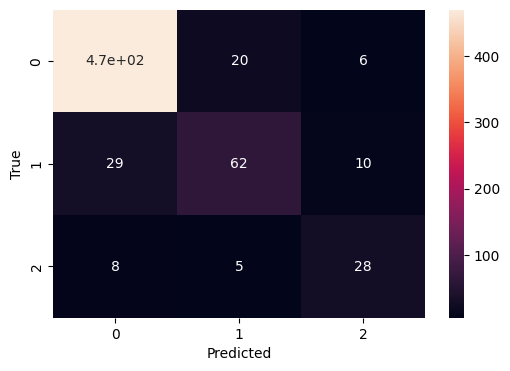

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sn
plt.figure(figsize=(6,4))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel("True")

DECISION TREE CLASSIFIER

In [20]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier(min_samples_split=6, min_samples_leaf=4, max_depth=6, )
tree_clf=tree_clf.fit(X_train,y_train)
y_pred=tree_clf.predict(X_test)


In [21]:
print("Accuracy-score:",accuracy_score(y_test,y_pred))
print("Recall-score:",recall_score(y_test,y_pred,average="weighted"))
print("Precision-score:",precision_score(y_test,y_pred,average='weighted'))

Accuracy-score: 0.8683385579937304
Recall-score: 0.8683385579937304
Precision-score: 0.8603398399877494


ENSEMBLING TECHNIQUE-VOTING CLASSIFIER

In [22]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
svm_clf=SVC(kernel="poly",degree=6,coef0=5,gamma=0.1,probability=True)
decision_tree=DecisionTreeClassifier(min_samples_split=6, min_samples_leaf=4, max_depth=6)
rnd_clf=RandomForestClassifier()
voting_clf=VotingClassifier(estimators=[("svm",svm_clf),('rf',rnd_clf),("decision_tree",decision_tree)],voting="hard")
voting_clf.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(coef0=5, degree=6, gamma=0.1, kernel='poly',
                                  probability=True)),
                             ('rf', RandomForestClassifier()),
                             ('decision_tree',
                              DecisionTreeClassifier(max_depth=6,
                                                     min_samples_leaf=4,
                                                     min_samples_split=6))])

In [ ]:
for clf in (rnd_clf, svm_clf,decision_tree, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.8761755485893417


ENSEMBLING TECHNIQUE-BAGGING CLASSIFIER

In [ ]:
from sklearn.ensemble import BaggingClassifier
#bagging classifier-has multiple base classifiers of same model which trains  on different random subsets
#voting classifier-has multiple base classifiers of different model that trains on same data.Each model produces diff output and final output is based on which output has max votes(hard voting)

In [ ]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,n_jobs=-1,max_samples=500, bootstrap=True)
bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

BOOSTING TECHNIQUES-ADA BOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=2000,learning_rate=0.2)

In [ ]:
ada_clf.fit(X_train,y_train)
y_pred=ada_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))